## Handwritten digit classification using the MNIST dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
from ml import nn

In [2]:
#Create Dataset
train_data = np.array(pd.read_csv("./data/mnist/mnist_train.csv"))
test_data = np.array(pd.read_csv("./data/mnist/mnist_test.csv"))

This is a  5


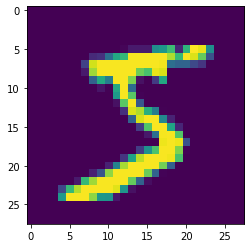

In [3]:
plt.imshow(train_data[0,1:].reshape(28,28))
print("This is a ",train_data[0,0])

In [4]:
X_train = train_data[:,1:].T/255
Y_train = train_data[:,0]
#one hot endcoding
Y_train = np.array([[(1 if i==y else 0) for i in range(0,10)] for y in Y_train]).T

X_test = test_data[:,1:].T/255
Y_test = test_data[:,0]
#one hot encoding
Y_test = np.array([[(1 if i==y else 0) for i in range(0,10)] for y in Y_test]).T

In [5]:
print("X_train: {}".format(X_train.shape))
print("Y_train: {}".format(Y_train.shape))

X_train: (784, 60000)
Y_train: (10, 60000)


In [6]:
#Create a feed forward neural network
L = [X_train.shape[0],50,30,20,10]
g = [nn.linear,nn.relu,nn.relu,nn.relu,nn.softmax]
network = nn.FeedForwardNN(L,g)

100%|███████████████████████████████████████████████████████████████████████████████| 938/938 [00:02<00:00, 407.22it/s]


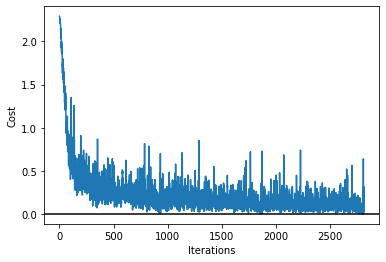

In [7]:
#Training the model on the train_data
BATCH_SIZE = 64
EPOCHS = 3
costs = []
for epoch in range(0,EPOCHS):
    for i in tqdm(range(0,X_train.shape[1],BATCH_SIZE)):
        X_batch = X_train[:,i:i+BATCH_SIZE]
        Y_batch = Y_train[:,i:i+BATCH_SIZE]
        c = network.train(X_batch,Y_batch,learning_rate=0.1,loss=nn.multiclass_cross_entropy)
        costs.append(c)
plt.plot(costs)
plt.axhline(color="k")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

In [8]:
#Accuracy of the model on the train data
out = network.predict(X_train)
pred = out.argmax(axis=0)
##one hot encoding predictions
pred = np.array([[(1 if i==y else 0) for i in range(0,10)] for y in pred]).T
accuracy = 1- np.sum((pred-Y_train)**2)/Y_train.shape[1]
print("Train Accuracy: ", accuracy)

Train Accuracy:  0.9211333333333334


In [9]:
#Testing the accuracy of the model on an untrained test_set
out = network.predict(X_test)
pred = out.argmax(axis=0)
##one hot encoding predictions
pred = np.array([[(1 if i==y else 0) for i in range(0,10)] for y in pred]).T
accuracy = 1- np.sum((pred-Y_test)**2)/Y_test.shape[1]
print("Test Accuracy: ", accuracy)

Test Accuracy:  0.911
